In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/drill.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[0.         0.         0.         ... 0.2961777  0.28840333 0.31345367]


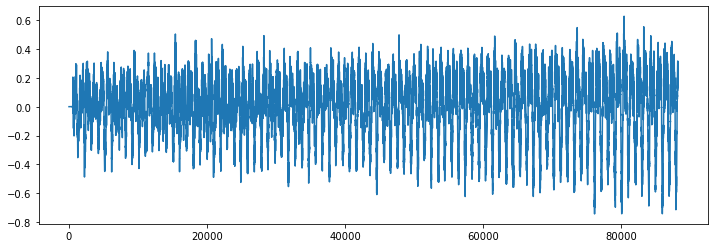

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [11185,  8202],
       [11214,  8240],
       [11053,  8593]], dtype=int16)

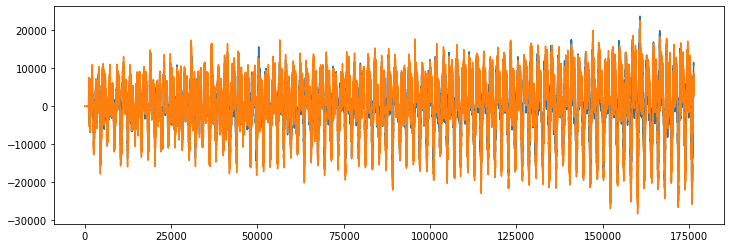

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

## Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-2.65856262e+02, -1.52376251e+02, -1.44367447e+02, ...,
        -1.23986404e+02, -1.15773888e+02, -1.11881607e+02],
       [ 1.24962982e+02,  1.39496201e+02,  1.55777527e+02, ...,
         1.61089813e+02,  1.49643921e+02,  1.19297073e+02],
       [ 7.55626380e-01, -6.67262650e+00, -1.54922886e+01, ...,
        -2.63325157e+01, -2.27142181e+01, -5.49225378e+00],
       ...,
       [ 4.95106936e+00,  3.92733049e+00,  3.36533666e+00, ...,
         6.90499640e+00,  6.27066231e+00,  2.16052842e+00],
       [-4.43625450e+00, -2.30463314e+00,  1.28918052e-01, ...,
         6.66649246e+00,  3.62798762e+00,  4.96686316e+00],
       [-3.74218225e+00,  6.07076287e-01,  5.01259279e+00, ...,
         7.48097849e+00,  4.87421083e+00,  2.62211251e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [11]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [05:32, 11.01it/s]D:\Anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [12:42, 16.10it/s]D:\Anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [13:16, 10.96it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.0524, 110.67095, -54.192833, 62.045406, ...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train


array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912871e+00],
       [-1.4296139e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708365e+00, -5.2008629e+00, -1.5975085e+00],
       [-4.9827820e+01,  1.8449375e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159244e-01,  2.7930877e+00],
       ...,
       [-4.2723694e+02,  9.2938095e+01,  2.8287885e+00, ...,
         8.1411356e-01,  6.6066748e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839476e+00, -1.9667517e+00, -8.8792092e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413875e+00]], dtype=float32)

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Model Creation

In [21]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


In [23]:
### No of classes
num_labels=y.shape[1]

In [24]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [67]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

### callback is used to train the model from last checkpoint or form that point last it was trained
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
205/219 [===========================>..] - ETA: 0s - loss: 0.8695 - accuracy: 0.7091
Epoch 00001: val_loss improved from inf to 0.72009, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8655 - accuracy: 0.7104 - val_loss: 0.7201 - val_accuracy: 0.7756
Epoch 2/100
201/219 [==========================>...] - ETA: 0s - loss: 0.8984 - accuracy: 0.7024
Epoch 00002: val_loss improved from 0.72009 to 0.71732, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8963 - accuracy: 0.7022 - val_loss: 0.7173 - val_accuracy: 0.7779
Epoch 3/100
206/219 [===========================>..] - ETA: 0s - loss: 0.8763 - accuracy: 0.7096
Epoch 00003: val_loss did not improve from 0.71732
219/219 [==============================] - 1s 3ms/step - loss: 0.8770 - accuracy: 0.7108 - val_loss: 0.7299 - val_accuracy: 0.7710
Epoch 4/100
212/219 [==========================

Epoch 29/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8662 - accuracy: 0.7140
Epoch 00029: val_loss did not improve from 0.68524
219/219 [==============================] - 1s 3ms/step - loss: 0.8632 - accuracy: 0.7147 - val_loss: 0.7098 - val_accuracy: 0.7728
Epoch 30/100
207/219 [===========================>..] - ETA: 0s - loss: 0.8554 - accuracy: 0.7135
Epoch 00030: val_loss did not improve from 0.68524
219/219 [==============================] - 1s 3ms/step - loss: 0.8526 - accuracy: 0.7142 - val_loss: 0.7080 - val_accuracy: 0.7905
Epoch 31/100
210/219 [===========================>..] - ETA: 0s - loss: 0.8921 - accuracy: 0.7025
Epoch 00031: val_loss did not improve from 0.68524
219/219 [==============================] - 1s 3ms/step - loss: 0.8898 - accuracy: 0.7044 - val_loss: 0.7211 - val_accuracy: 0.7762
Epoch 32/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8726 - accuracy: 0.7113
Epoch 00032: val_loss did not improve from 0.68524
219/219 [==

Epoch 58/100
204/219 [==========================>...] - ETA: 0s - loss: 0.8706 - accuracy: 0.7143
Epoch 00058: val_loss did not improve from 0.66988
219/219 [==============================] - 1s 3ms/step - loss: 0.8681 - accuracy: 0.7141 - val_loss: 0.6790 - val_accuracy: 0.7905
Epoch 59/100
212/219 [============================>.] - ETA: 0s - loss: 0.8610 - accuracy: 0.7117
Epoch 00059: val_loss did not improve from 0.66988
219/219 [==============================] - 1s 3ms/step - loss: 0.8574 - accuracy: 0.7130 - val_loss: 0.6898 - val_accuracy: 0.7905
Epoch 60/100
206/219 [===========================>..] - ETA: 0s - loss: 0.8521 - accuracy: 0.7231
Epoch 00060: val_loss did not improve from 0.66988
219/219 [==============================] - 1s 3ms/step - loss: 0.8512 - accuracy: 0.7221 - val_loss: 0.6839 - val_accuracy: 0.7934
Epoch 61/100
202/219 [==========================>...] - ETA: 0s - loss: 0.8617 - accuracy: 0.7206
Epoch 00061: val_loss did not improve from 0.66988
219/219 [==

201/219 [==========================>...] - ETA: 0s - loss: 0.8316 - accuracy: 0.7225
Epoch 00087: val_loss did not improve from 0.66741
219/219 [==============================] - 1s 3ms/step - loss: 0.8384 - accuracy: 0.7208 - val_loss: 0.6777 - val_accuracy: 0.7979
Epoch 88/100
197/219 [=========================>....] - ETA: 0s - loss: 0.8407 - accuracy: 0.7200
Epoch 00088: val_loss did not improve from 0.66741
219/219 [==============================] - 1s 3ms/step - loss: 0.8479 - accuracy: 0.7193 - val_loss: 0.6691 - val_accuracy: 0.7956
Epoch 89/100
199/219 [==========================>...] - ETA: 0s - loss: 0.8429 - accuracy: 0.7272
Epoch 00089: val_loss did not improve from 0.66741
219/219 [==============================] - 1s 3ms/step - loss: 0.8347 - accuracy: 0.7288 - val_loss: 0.6922 - val_accuracy: 0.7813
Epoch 90/100
207/219 [===========================>..] - ETA: 0s - loss: 0.8426 - accuracy: 0.7227
Epoch 00090: val_loss improved from 0.66741 to 0.66264, saving model to sav

In [68]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7859187126159668


## Testing Some Test Audio Data
Steps

1.  Preprocess the new audio data
2. predict the classes
2. Invere transform your Predicted Label

In [86]:
filename="UrbanSound8K/drill.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)


#predicted_label=model.predict(mfccs_scaled_features)

#classes_x=np.argmax(predicted_label,axis=1)



[-144.42174    169.57693    -30.572735    32.48221     -3.8814087
   20.254868     7.3886237   10.551708     5.872424    12.411162
   -2.8971744   11.000191     3.4244745    1.778621     4.3311367
    8.169777     2.4476614    4.3423457    3.2149613    3.2758996
    4.1357265    2.9222047    3.5303476    3.3579614    8.209842
    3.3870914    6.294459     4.048114     5.424234     4.6208215
    2.8749924    1.0284042    1.5020751    0.8402828    1.703531
    1.9360516    1.8098248    1.0791645    3.2778003    3.4157312]
[[-144.42174    169.57693    -30.572735    32.48221     -3.8814087
    20.254868     7.3886237   10.551708     5.872424    12.411162
    -2.8971744   11.000191     3.4244745    1.778621     4.3311367
     8.169777     2.4476614    4.3423457    3.2149613    3.2758996
     4.1357265    2.9222047    3.5303476    3.3579614    8.209842
     3.3870914    6.294459     4.048114     5.424234     4.6208215
     2.8749924    1.0284042    1.5020751    0.8402828    1.703531
     1.9

In [92]:
y_predict = np.argmax(model.predict((mfccs_scaled_features)), axis=-1)
y_predict

array([5], dtype=int64)

In [93]:
prediction_class = labelencoder.inverse_transform(y_predict) 
prediction_class

array(['engine_idling'], dtype='<U16')